# Part 1 Data Processing

In [1]:
import os 
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#stating point of the directory
#
data_dir = "stat-3612-group-project-2024-fall"

# creating a path to the different files
train_csv_file = os.path.join(data_dir, "train.csv")
test__csv_file = os.path.join(data_dir, "test.csv")
valid_csv_file = os.path.join(data_dir, "valid.csv")
ehr_pkl_file = os.path.join(data_dir, "ehr_preprocessed_seq_by_day_cat_embedding.pkl")
# Loading the data to dataframes
train_df = pd.read_csv(train_csv_file)
valid_df = pd.read_csv(valid_csv_file)
test_df = pd.read_csv(test__csv_file)

with open(ehr_pkl_file, "rb") as f:
    ehr_data = pickle.load(f)

print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(49451, 8)
(16721, 8)
(16293, 7)


In [3]:
# Define a function to process each DataFrame
def add_photo_data(df, data_dir):
    photo_data_list = []
    for i in df["image_path"]:
        photo_path = os.path.join(data_dir, "image_features", "cxr_features", i)
        with open(photo_path + ".pkl", "rb") as f:
            photo = pickle.load(f)
            photo_data = photo.tolist()
            photo_data_list.append(photo_data)
    df["image_data"] = photo_data_list

# List of DataFrames to process
dataframes = [train_df, valid_df, test_df]
# Loop through each DataFrame and apply the function
for df in dataframes:
    add_photo_data(df, data_dir)



In [4]:
#Merging train_df and features values with only the last observation
train_merged_admits_latest = []
for _, admit in train_df.iterrows():
    # get the last observation for each patient
    feat_arr_latest = pd.Series(ehr_data['feat_dict'][admit['id']][-1], index=ehr_data['feature_cols'])
    train_merged_admits_latest.append(pd.concat([admit, feat_arr_latest]))
train_merged_df_latest = pd.DataFrame(train_merged_admits_latest)

test_merged_admits_latest = []
for _, admit in test_df.iterrows():
    feat_arr_latest = pd.Series(ehr_data['feat_dict'][admit['id']][-1], index=ehr_data['feature_cols'])
    test_merged_admits_latest.append(pd.concat([admit, feat_arr_latest]))
test_merged_df_latest = pd.DataFrame(test_merged_admits_latest)

valid_merged_admits_latest = []
for _, admit in valid_df.iterrows():
    feat_arr_latest = pd.Series(ehr_data['feat_dict'][admit['id']][-1], index=ehr_data['feature_cols'])
    valid_merged_admits_latest.append(pd.concat([admit, feat_arr_latest]))
valid_merged_df_latest = pd.DataFrame(valid_merged_admits_latest)


print(train_merged_df_latest.shape)
print(valid_merged_df_latest.shape)
print(test_merged_df_latest.shape)

(49451, 180)
(16721, 180)
(16293, 179)


In [5]:
# Check for missing values in train_merged_df_latest
missing_train = train_merged_df_latest.isnull().sum()
print("Missing values in train_merged_df_latest:")
if missing_train.sum() == 0:
    print("No missing values found.")
else:
    print(missing_train[missing_train > 0])

# Check for missing values in valid_merged_df_latest
missing_valid = valid_merged_df_latest.isnull().sum()
print("\nMissing values in valid_merged_df_latest:")
if missing_valid.sum() == 0:
    print("No missing values found.")
else:
    print(missing_valid[missing_valid > 0])

# Check for missing values in test_merged_df_latest
missing_test = test_merged_df_latest.isnull().sum()
print("\nMissing values in test_merged_df_latest:")
if missing_test.sum() == 0:
    print("No missing values found.")
else:
    print(missing_test[missing_test > 0])

train_merged_df_latest.head()

Missing values in train_merged_df_latest:
No missing values found.

Missing values in valid_merged_df_latest:
No missing values found.

Missing values in test_merged_df_latest:
No missing values found.


,id,subject_id,hadm_id,dicom_id,study_id,ViewPosition,image_path,readmitted_within_30days,image_data,age,...,PRE-NATAL VITAMINS,ANESTHETICS,ANTIBIOTICS,ANTIHYPERGLYCEMICS,ANTIINFLAM.TUMOR NECROSIS FACTOR INHIBITING AGENTS,SEDATIVE/HYPNOTICS,ANTIDOTES,AUTONOMIC DRUGS,VITAMINS,BIOLOGICALS
0,10869829_25238191,10869829,25238191,78ab2105-42f58137-487be951-2fb5b70a-f3f76660,53096236,AP,78ab2105-42f58137-487be951-2fb5b70a-f3f76660.jpg,False,"[-0.0031398781575262547, -0.004398734774440527...",52,...,0,0,18,4,0,3,0,0,0,0
1,10869829_25238191,10869829,25238191,64e61e55-13c7ddf7-70e4a8d8-940cec1c-084a6f23,53621244,AP,64e61e55-13c7ddf7-70e4a8d8-940cec1c-084a6f23.jpg,False,"[-0.0031230109743773937, -0.004203366115689278...",52,...,0,0,18,4,0,3,0,0,0,0
2,10869829_25238191,10869829,25238191,cc0d53de-4a394a45-dde65f7c-b022a912-5c0d3e5c,56056422,AP,cc0d53de-4a394a45-dde65f7c-b022a912-5c0d3e5c.jpg,False,"[-0.0030800895765423775, -0.003950716927647591...",52,...,0,0,18,4,0,3,0,0,0,0
3,12347278_29852086,12347278,29852086,ddf639da-d1c80371-03a928d3-91075ec2-3bbaf396,51319270,AP,ddf639da-d1c80371-03a928d3-91075ec2-3bbaf396.jpg,False,"[-0.003082436043769121, -0.0043939221650362015...",62,...,0,1,3,0,0,0,0,0,1,0
4,12347278_29852086,12347278,29852086,4c828aa8-78980d32-20a70ec1-5f2de42d-bda06863,52234220,AP,4c828aa8-78980d32-20a70ec1-5f2de42d-bda06863.jpg,False,"[-0.003114421386271715, -0.004283882211893797,...",62,...,0,1,3,0,0,0,0,0,1,0


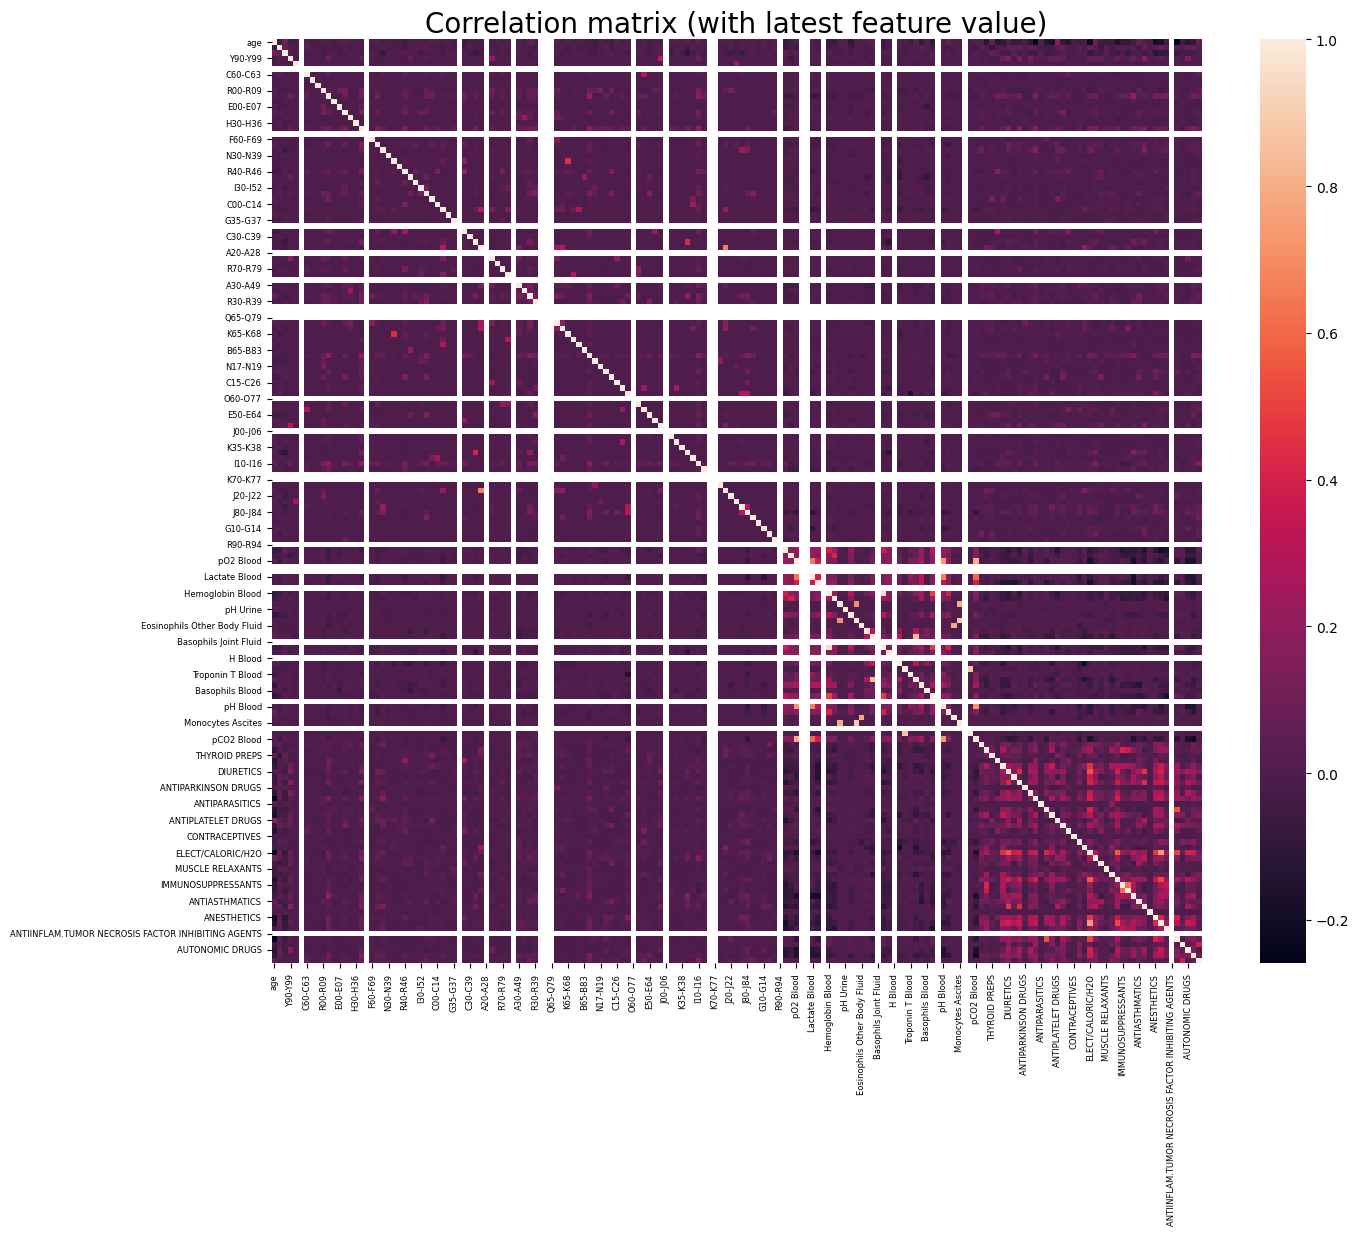

In [7]:
# Correlation matrix and heatmap
feat_resp_cols_latest = train_merged_df_latest.columns[9:].to_list()
corr_mat_latest = train_merged_df_latest[feat_resp_cols_latest].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat_latest, annot=False, fmt=".2f", linewidths=0)
plt.title("Correlation matrix (with latest feature value)", fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

# Finding the columns of categorical features and numberical features
cat_cols = [ehr_data['feature_cols'][i] for i in ehr_data['cat_idxs']] 
icd_cols = ehr_data['icd_cols']
cat_cols.append('readmitted_within_30days')






[]
(49451, 159)


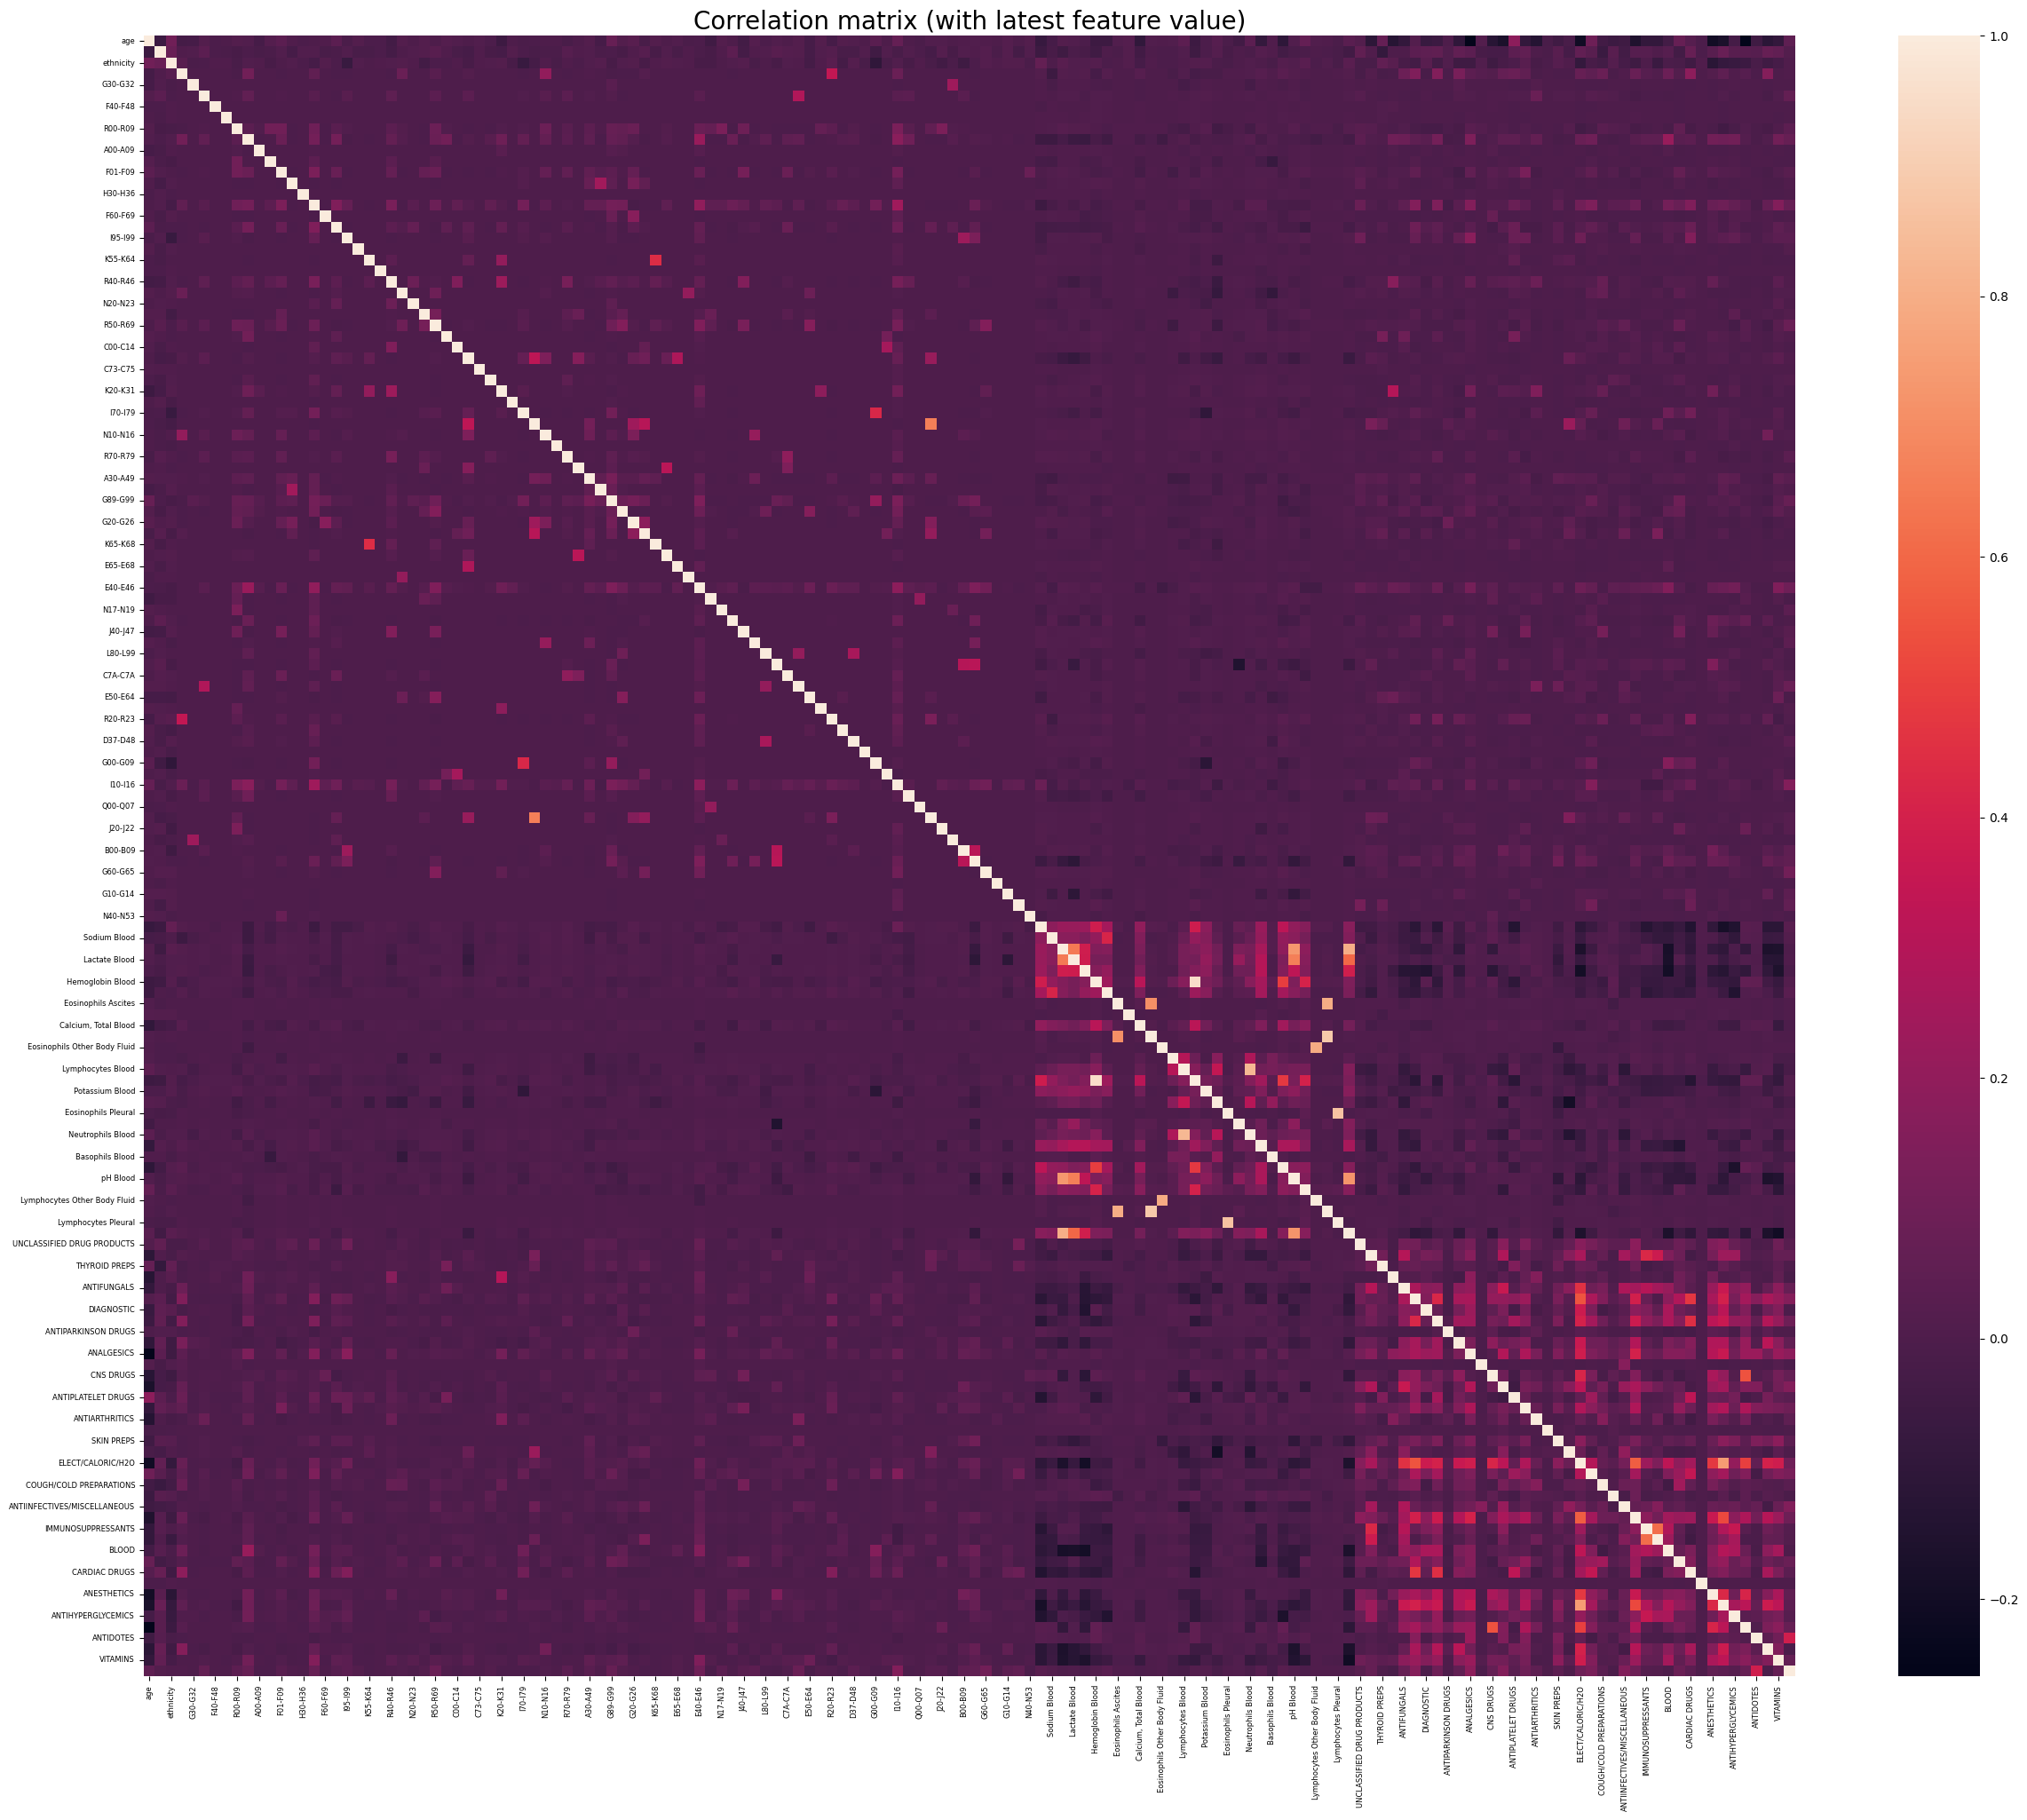

Updated feature_drop list: ['Hematocrit Blood', 'Lymphocytes Ascites', 'Lymphocytes Pleural', 'Neutrophils Blood', 'pO2 Blood', 'Eosinophils Ascites', 'Lymphocytes Other Body Fluid', 'ELECT/CALORIC/H2O', 'pH Blood', 'pCO2 Blood']
Number of features to drop: 10
Number of features before dropping: 150
age                           age                             1.000000
Hematocrit Blood              Hemoglobin Blood                0.951144
Lymphocytes Ascites           Monocytes Ascites               0.886378
Lymphocytes Pleural           Eosinophils Pleural             0.865947
Neutrophils Blood             Lymphocytes Blood               0.831498
pO2 Blood                     pCO2 Blood                      0.800620
Eosinophils Ascites           Monocytes Ascites               0.797692
Lymphocytes Other Body Fluid  Eosinophils Other Body Fluid    0.790545
ELECT/CALORIC/H2O             ANTIBIOTICS                     0.746124
pH Blood                      pO2 Blood                     

In [10]:
# Deleting the columns with constant values\
# drop features with constant values in the training set
feat_cols_latest = train_merged_df_latest.columns[9:].to_list()
const_cols_latest = [col for col in feat_cols_latest if train_merged_df_latest[col].nunique() <= 1]
print(const_cols_latest)

train_merged_df_latest = train_merged_df_latest.drop(columns=const_cols_latest, axis=1)
valid_merged_df_latest = valid_merged_df_latest.drop(columns=const_cols_latest, axis=1)
test_merged_df_latest = test_merged_df_latest.drop(columns=const_cols_latest, axis=1)

print(train_merged_df_latest.shape)

# Correlation matrix and heatmap
feat_resp_cols_latest = train_merged_df_latest.columns[9:].to_list()
corr_mat_latest = train_merged_df_latest[feat_resp_cols_latest].corr()

plt.figure(figsize=(30, 24))
sns.heatmap(corr_mat_latest, annot=False, fmt=".2f", linewidths=0)
plt.title("Correlation matrix (with latest feature value)", fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

# Find pairs of variables with correlation greater than 0.7
high_corr_pairs = corr_mat_latest.abs().unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.7]

# Display the pairs
high_corr_pairs
feature_drop = []
# Add highly correlated pairs to the feature_drop list
for i in high_corr_pairs.index:
    if i[0] not in feature_drop:
        feature_drop.append(i[0])
feature_drop.remove("age")
print("Updated feature_drop list:", feature_drop)
print("Number of features to drop:", len(feature_drop))
print("Number of features before dropping:", len(feat_resp_cols_latest))
print(high_corr_pairs)

# drop all the highly correlated features
train_merged_df_latest = train_merged_df_latest.drop(columns=feature_drop, axis=1)
valid_merged_df_latest = valid_merged_df_latest.drop(columns=feature_drop, axis=1)
test_merged_df_latest = test_merged_df_latest.drop(columns=feature_drop, axis=1)
print(train_merged_df_latest.shape)
print(valid_merged_df_latest.shape)
print(test_merged_df_latest.shape)


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#update the feature columns
feat_train = train_merged_df_latest.columns[9:].to_list()
feat_test = test_merged_df_latest.columns[8:].to_list()
# PCA to let the model learn the most important features and less correlated features
# Standardize the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_merged_df_latest[feat_train])
valid_scaled = scaler.transform(valid_merged_df_latest[feat_train])
test_scaled = scaler.transform(test_merged_df_latest[feat_test])

# Apply PCA
pca = PCA(n_components=0.8)  # Retain 80% of variance
train_pca = pca.fit_transform(train_scaled)
valid_pca = pca.transform(valid_scaled)
test_pca = pca.transform(test_scaled)

# Convert PCA results back to DataFrame
train_pca_df = pd.DataFrame(train_pca, columns=[f'PC{i+1}' for i in range(train_pca.shape[1])])
valid_pca_df = pd.DataFrame(valid_pca, columns=[f'PC{i+1}' for i in range(valid_pca.shape[1])])
test_pca_df = pd.DataFrame(test_pca, columns=[f'PC{i+1}' for i in range(test_pca.shape[1])])

# Add the target variable back to the PCA DataFrame
train_pca_df['readmitted_within_30days'] = train_merged_df_latest['readmitted_within_30days'].values
valid_pca_df['readmitted_within_30days'] = valid_merged_df_latest['readmitted_within_30days'].values

# Add back the image data 
train_pca_df['image_data'] = train_merged_df_latest['image_data'].values
valid_pca_df['image_data'] = valid_merged_df_latest['image_data'].values
test_pca_df['image_data'] = test_merged_df_latest['image_data'].values

# Display the shape of the PCA DataFrames
print(train_pca_df.shape)
print(valid_pca_df.shape)
print(test_pca_df.shape)

(49451, 93)
(16721, 93)
(16293, 92)


In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define the target variable and features
target = 'readmitted_within_30days'
features = train_pca_df.columns.drop([target, 'image_data'])

# Apply SelectKBest to select the top k features
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(train_pca_df[features], train_pca_df[target])

# Get the selected feature names
selected_features = features[selector.get_support()]

# Transform the dataframes to keep only the selected features
train_selected_df = train_pca_df[selected_features]
valid_selected_df = valid_pca_df[selected_features]
test_selected_df = test_pca_df[selected_features]

# Add the target variable back to the dataframes
train_selected_df[target] = train_pca_df[target]
valid_selected_df[target] = valid_pca_df[target]

# Display the shapes of the new dataframes
print(train_selected_df.shape)
print(valid_selected_df.shape)
print(test_selected_df.shape)

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64',
       'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73',
       'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82',
       'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91'],
      dtype='object')
(49451, 21)
(16721, 21)
(16293, 20)


/var/folders/3y/ypr7d56550vg0dzyqqlpj1mm0000gn/T/ipykernel_83188/2276009701.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selected_df[target] = train_pca_df[target]
/var/folders/3y/ypr7d56550vg0dzyqqlpj1mm0000gn/T/ipykernel_83188/2276009701.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_selected_df[target] = valid_pca_df[target]


In [23]:
# # Finding the columns of categorical features and numberical features
# cat_cols = [ehr_data['feature_cols'][i] for i in ehr_data['cat_idxs']] 
# icd_cols = ehr_data['icd_cols']
# cat_cols.append('readmitted_within_30days')

# cat_cols_latest = [col for col in train_merged_df_latest.columns[7:] if col in cat_cols or col in icd_cols]
# num_cols_latest = [col for col in train_merged_df_latest.columns[7:] if col not in cat_cols_latest]
# cat_cols = [ehr_data['feature_cols'][i] for i in ehr_data['cat_idxs']] 
# icd_cols = ehr_data['icd_cols']
# cat_cols.append('readmitted_within_30days')

# cat_cols_latest = [col for col in train_merged_df_latest.columns[7:] if col in cat_cols or col in icd_cols]
# num_cols_latest = [col for col in train_merged_df_latest.columns[7:] if col not in cat_cols_latest]

# # Find pairs of variables with correlation greater than 0.5
# high_corr_pairs = corr_df.abs().unstack().sort_values(ascending=False).drop_duplicates()
# high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.5]

# # Display the pairs
# high_corr_pairs
# # Add highly correlated pairs to the feature_drop list
# for feature1, feature2 in high_corr_pairs.index:
#     if feature1 not in feature_drop:
#         feature_drop.append(feature1)
#     if feature2 not in feature_drop:
#         feature_drop.append(feature2)
        
# print("Updated feature_drop list:", feature_drop)